# Simulación de Montecarlo [70 pts]

## Diferencia entre el Tipo 1 y Tipo 2

La *Integración de Montecarlo* **tipo 1** utiliza el valor promedio de la función mediante la suma de Riemann, dividiendo la región de la cual se quiere calcular el área en varios rectángulos.
En cambio, la *Integración de Montecarlo* **tipo 2** es más útil cuando se trata de regiones de las cuales no se puede describir fácilmente su geometría tales como desigualdades o polinomios de mayor grado.

In [1]:
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
def montecarlo_tipo_1(f,a,b,N):
    return (b-a)/N*np.sum(f(np.random.uniform(a,b,N)))
def montecarlo_tipo_2(region,a1,b1,a2,b2,N):
    A_R=(b1-a1)*(b2-a2)
    x=np.random.uniform(a1,b1,N.astype(int))
    y=np.random.uniform(a2,b2,N.astype(int))
    return A_R*np.sum(region(x))/N

## Función 1

**Gráfica**

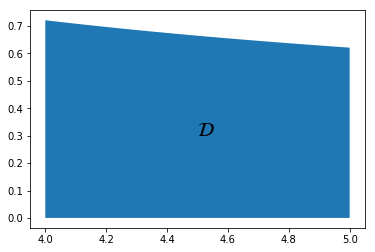

In [2]:
def función_1(x):
    return 1/np.log(x)
x=np.linspace(4,5)
y=función_1(x)
plt.fill_between(x,y)
plt.text(4.5,0.3,"$\mathcal{D}$",fontsize=20)
plt.show()

**Integración de Montecarlo Tipo 1**

In [3]:
a,b=4,5
N=np.logspace(1,5,5)
df=pd.DataFrame(index=N,columns=["Función 1"],dtype="float")
df.index.name="Cantidad de Términos"
for n in N:
    df.loc[n,"Función 1"]=montecarlo_tipo_1(función_1,a,b,n.astype(int))
df

,Función 1
Cantidad de Términos,
10.0,0.668454
100.0,0.666286
1000.0,0.667179
10000.0,0.666832
100000.0,0.667078


**Integración de Montecarlo Tipo 2**

In [4]:
a1,a2,b1,b2=4,4,5,5
N=np.logspace(1,5,5)
df=pd.DataFrame(index=N,columns=["Función 1"],dtype="float")
df.index.name="Cantidad de Términos"
for n in N:
    df.loc[n,"Función 1"]=montecarlo_tipo_2(función_1,a1,b1,a2,b2,n)      
df

,Función 1
Cantidad de Términos,
10.0,0.672060
100.0,0.667766
1000.0,0.667677
10000.0,0.666533
100000.0,0.666988


## Función 2

**Gráfica**

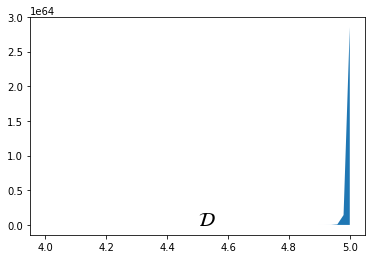

In [5]:
def función_2(x):
    return np.exp(np.exp(x))
x=np.linspace(4,5)
y=función_2(x)
plt.fill_between(x,y)
plt.text(4.5,función_2(4.5)/2,"$\mathcal{D}$",fontsize=20)
plt.show()

**Integración de Montecarlo Tipo 1**

In [6]:
a,b=4,5
N=np.logspace(1,5,5)
df=pd.DataFrame(index=N,columns=["Función 2"],dtype="float")
df.index.name="Cantidad de Términos"
for n in N:
    df.loc[n,"Función 2"]=montecarlo_tipo_1(función_2,a,b,n.astype(int))
df

,Función 2
Cantidad de Términos,
10.0,9.753657e+56
100.0,1.026249e+61
1000.0,1.652692e+62
10000.0,1.947561e+62
100000.0,1.951852e+62


**Integración de Montecarlo Tipo 2**

In [7]:
a1,a2,b1,b2=4,4,5,5
N=np.logspace(1,5,5)
df=pd.DataFrame(index=N,columns=["Función 2"],dtype="float")
df.index.name="Cantidad de Términos"
for n in N:
    df.loc[n,"Función 2"]=montecarlo_tipo_2(función_2,a1,b1,a2,b2,n)      
df

,Función 2
Cantidad de Términos,
10.0,1.180541e+62
100.0,2.262924e+62
1000.0,2.184498e+62
10000.0,1.840398e+62
100000.0,1.915527e+62


## Función 3

**Gráfica**

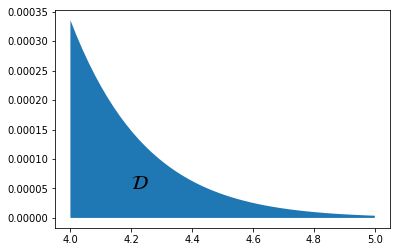

In [8]:
def función_3(x):
    return np.exp(-(x**2)/2)
x=np.linspace(4,5)
y=función_3(x)
plt.fill_between(x,y)
plt.text(4.2,0.00005,"$\mathcal{D}$",fontsize=20)
plt.show()

**Integración de Montecarlo Tipo 1**

In [9]:
a,b=4,5
N=np.logspace(1,5,5)
df=pd.DataFrame(index=N,columns=["Función 3"],dtype="float")
df.index.name="Cantidad de Términos"
for n in N:
    df.loc[n,"Función 3"]=montecarlo_tipo_1(función_3,a,b,n.astype(int))
df

,Función 3
Cantidad de Términos,
10.0,0.000066
100.0,0.000086
1000.0,0.000082
10000.0,0.000079
100000.0,0.000079


**Integración de Montecarlo Tipo 2**

In [10]:
a1,a2,b1,b2=4,4,5,5
N=np.logspace(1,5,5)
df=pd.DataFrame(index=N,columns=["Función 3"],dtype="float")
df.index.name="Cantidad de Términos"
for n in N:
    df.loc[n,"Función 3"]=montecarlo_tipo_2(función_3,a1,b1,a2,b2,n)      
df

,Función 3
Cantidad de Términos,
10.0,0.000075
100.0,0.000074
1000.0,0.000076
10000.0,0.000079
100000.0,0.000079


## Función 4

**Gráfica**

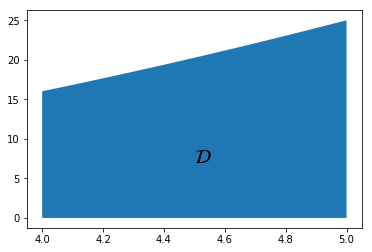

In [11]:
def función_4(x):
    return (1+x**4)**(1/2)
x=np.linspace(4,5)
y=función_4(x)
plt.fill_between(x,y)
plt.text(4.5,7,"$\mathcal{D}$",fontsize=20)
plt.show()

**Integración de Montecarlo Tipo 1**

In [12]:
a,b=4,5
N=np.logspace(1,5,5)
df=pd.DataFrame(index=N,columns=["Función 4"],dtype="float")
df.index.name="Cantidad de Términos"
for n in N:
    df.loc[n,"Función 4"]=montecarlo_tipo_1(función_4,a,b,n.astype(int))
df

,Función 4
Cantidad de Términos,
10.0,19.632712
100.0,19.926845
1000.0,20.412224
10000.0,20.341439
100000.0,20.340522


**Integración de Montecarlo Tipo 2**

In [13]:
a1,a2,b1,b2=4,4,5,5
N=np.logspace(1,5,5)
df=pd.DataFrame(index=N,columns=["Función 4"],dtype="float")
df.index.name="Cantidad de Términos"
for n in N:
    df.loc[n,"Función 4"]=montecarlo_tipo_2(función_4,a1,b1,a2,b2,n)      
df

,Función 4
Cantidad de Términos,
10.0,20.193238
100.0,20.894200
1000.0,20.292246
10000.0,20.336882
100000.0,20.355825


## Función 5

**Gráfica**

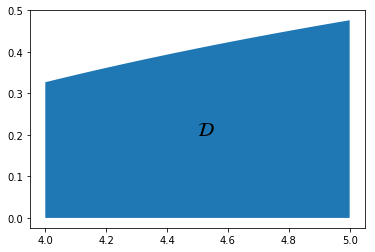

In [14]:
def función_5(x):
    return np.log(np.log(x))
x=np.linspace(4,5)
y=función_5(x)
plt.fill_between(x,y)
plt.text(4.5,0.2,"$\mathcal{D}$",fontsize=20)
plt.show()

**Integración de Montecarlo Tipo 1**

In [15]:
a,b=4,5
N=np.logspace(1,5,5)
df=pd.DataFrame(index=N,columns=["Función 5"],dtype="float")
df.index.name="Cantidad de Términos"
for n in N:
    df.loc[n,"Función 5"]=montecarlo_tipo_1(función_5,a,b,n.astype(int))
df

,Función 5
Cantidad de Términos,
10.0,0.401784
100.0,0.405103
1000.0,0.407894
10000.0,0.405871
100000.0,0.405768


**Integración de Montecarlo Tipo 2**

In [16]:
a1,a2,b1,b2=4,4,5,5
N=np.logspace(1,5,5)
df=pd.DataFrame(index=N,columns=["Función 5"],dtype="float")
df.index.name="Cantidad de Términos"
for n in N:
    df.loc[n,"Función 5"]=montecarlo_tipo_2(función_5,a1,b1,a2,b2,n)      
df

,Función 5
Cantidad de Términos,
10.0,0.431454
100.0,0.408397
1000.0,0.405307
10000.0,0.406179
100000.0,0.405877


## Reflexión sobre ambos Métodos

No hay mucha diferencia en la mayoría de las funciones entre los dos diferentes métodos de integración. Sin embargo en cada una de las funciones se ve una sutil **superioridad del método 2** sobre el método 1 en cuanto a eficiencia, ya que se aproxima mejor al valor del área real utilizando menos términos (aunque sea mínima la ventaja que aparenta tener sobre el tipo 2).

# Probabilidad Precio-Umbral [40 pts]

In [17]:
def get_historical_closes(ticker,start_date,end_date=None):
    closes=web.YahooDailyReader(ticker,start_date,end_date).read()
    return pd.DataFrame(closes.loc[:,"Adj Close"])
def calc_daily_returns(closes):
    return np.log(closes/closes.shift(1)).dropna()
def daily_ret_sim(mu,sigma,ndays,ntraj,start_date):
    dates=pd.date_range(start=start_date,periods=ndays)
    return pd.DataFrame(sigma*np.random.randn(ndays,ntraj)+mu,index=dates)

## Apple

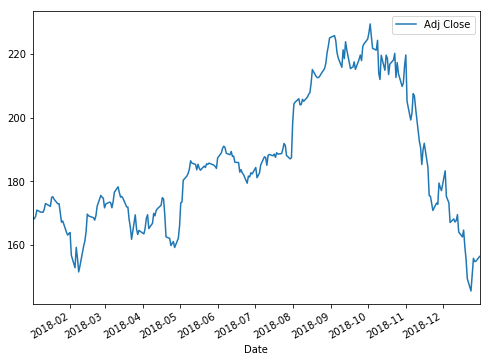

In [18]:
ticker="AAPL"
start_date="2018-01-01"
end_date="2018-12-31"
closes=get_historical_closes(ticker,start_date,end_date)
closes.plot(figsize=(8,6));

In [19]:
closes.iloc[-1]

Adj Close    156.463837
Name: 2018-12-31 00:00:00, dtype: float64

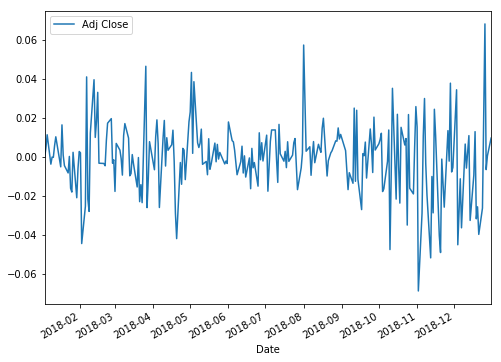

In [20]:
daily_returns=calc_daily_returns(closes)
daily_returns.plot(figsize=(8,6));

In [21]:
mu=daily_returns.mean().values[0]
sigma=daily_returns.std().values[0]
mu,sigma

(-0.0002926207779216893, 0.018126721360148486)

In [22]:
ndays=360
ntraj=100
start_date="2019-01-01"
simret=daily_ret_sim(mu,sigma,ndays,ntraj,start_date)
simret

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
2019-01-01,0.000261,-0.008719,0.018316,0.020365,0.000799,-0.018735,-0.007159,0.017003,-0.003639,-0.018922,...,-0.018985,-0.039276,-0.008966,-0.010570,-0.001377,-0.009516,-0.021668,-0.010057,0.030720,-0.040728
2019-01-02,0.034755,0.025507,0.043729,-0.034513,0.011432,-0.003577,0.002843,0.004718,-0.016070,0.001251,...,-0.009902,0.026823,-0.001438,-0.012265,0.014465,-0.008521,-0.019578,0.037715,0.009598,0.009082
2019-01-03,0.003030,-0.025186,0.015669,-0.017384,0.046797,0.009507,-0.049911,-0.008537,0.004506,0.004125,...,0.006930,0.036106,-0.050622,-0.003739,-0.003576,-0.031170,-0.020191,0.025224,0.016926,-0.039840
2019-01-04,0.023193,0.028689,0.005740,-0.030302,-0.023254,-0.008660,-0.003878,0.026232,-0.023192,0.003362,...,-0.004088,0.003606,0.007315,0.015613,0.015034,-0.001540,0.008984,0.001487,-0.014074,0.011929
2019-01-05,-0.013543,-0.006711,-0.011175,0.013230,-0.012742,0.027349,0.012663,0.010517,0.006704,0.007998,...,-0.007546,-0.009994,-0.016478,0.004166,-0.001151,-0.021719,-0.022430,-0.035531,0.008203,-0.024488
2019-01-06,0.007672,0.032323,0.006349,0.009820,-0.018267,0.001157,-0.009552,0.018395,0.021835,0.007259,...,0.005732,0.003556,0.032620,0.000742,-0.010362,-0.025555,0.002607,0.000431,0.009515,0.037204
2019-01-07,0.011519,0.031394,0.015135,-0.008347,-0.009555,0.015740,0.018283,-0.020162,-0.003913,0.020816,...,0.017961,0.021883,0.020157,0.020120,0.019270,0.033375,0.002858,-0.005223,0.011833,0.006790
2019-01-08,-0.015322,0.011199,0.001884,-0.002874,-0.015368,-0.016467,-0.008669,0.019473,0.001566,0.017754,...,-0.005693,0.017897,0.002873,-0.001043,-0.002516,-0.029811,-0.001528,-0.004050,0.035261,0.001101
2019-01-09,-0.006989,-0.019947,-0.019471,-0.002651,-0.013044,-0.008985,0.005768,0.035315,0.008034,0.016941,...,0.017615,-0.003009,0.021804,-0.029948,-0.001652,0.021710,0.005147,0.007620,0.006463,0.006101
2019-01-10,-0.019640,0.025229,-0.008450,0.013587,0.015021,-0.007471,0.013233,-0.006646,-0.001082,-0.006876,...,0.044318,0.021355,0.042073,0.014828,-0.009236,0.036121,0.002589,-0.002317,0.011453,0.009009


In [23]:
simdata=(closes.iloc[-1,:].values[0])*np.exp(simret.cumsum())
simdata

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
2019-01-01,156.504683,155.105483,159.356068,159.682907,156.588827,153.559800,155.347664,159.146930,155.895525,153.531044,...,153.521422,150.437619,155.067255,154.818663,156.248594,154.981954,153.110014,154.898160,161.345058,150.219400
2019-01-02,162.039659,159.112685,166.479104,154.265813,158.389235,153.011487,155.789970,159.899566,153.410343,153.723230,...,152.008804,154.527488,154.844413,152.931395,158.525128,153.666934,150.141601,160.851664,162.901038,151.589914
2019-01-03,162.531441,155.155288,169.108257,151.607209,165.977529,154.473156,148.205200,158.540260,154.103210,154.358724,...,153.065839,160.208738,147.200939,152.360589,157.959319,148.950965,147.140521,164.960574,165.681698,145.669313
2019-01-04,166.345118,159.671004,170.081724,147.082160,162.162418,153.141209,147.631609,162.754059,150.570337,154.878618,...,152.441379,160.787512,148.281626,154.758058,160.352066,148.721772,148.468399,165.206057,163.366263,147.417481
2019-01-05,164.107415,158.602986,168.191603,149.041029,160.109237,157.387320,149.512895,164.474726,151.583144,156.122356,...,151.295402,159.188604,145.858269,155.404063,160.167532,145.526479,145.175255,159.439114,164.711828,143.851317
2019-01-06,165.371261,163.813319,169.262807,150.511855,157.211138,157.569525,148.091479,167.528233,154.929364,157.259791,...,152.165124,159.755729,150.694583,155.519489,158.516376,141.854716,145.554275,159.507773,166.286597,149.303997
2019-01-07,167.287202,169.037583,171.844114,149.260739,155.716180,160.069246,150.823949,164.184294,154.324331,160.567554,...,154.922802,163.290158,153.763022,158.680199,161.600656,146.668998,145.970897,158.676833,168.266011,150.321290
2019-01-08,164.743576,170.941270,172.168099,148.832358,153.341366,157.454998,149.522034,167.412835,154.566207,163.443726,...,154.043256,166.238914,154.205412,158.514727,161.194530,142.361241,145.748025,158.035516,174.305020,150.486938
2019-01-09,163.596126,167.565242,168.848298,148.438397,151.354170,156.046613,150.387001,173.430711,155.812936,166.236176,...,156.780817,165.739477,157.604604,153.837883,160.928422,145.485733,146.500197,159.244303,175.435282,151.407866
2019-01-10,160.414474,171.846498,167.427535,150.468998,153.644827,154.885067,152.390369,172.281996,155.644483,165.096989,...,163.885231,169.316925,164.376934,156.136033,159.448997,150.836898,146.880015,158.875693,177.456129,152.778044


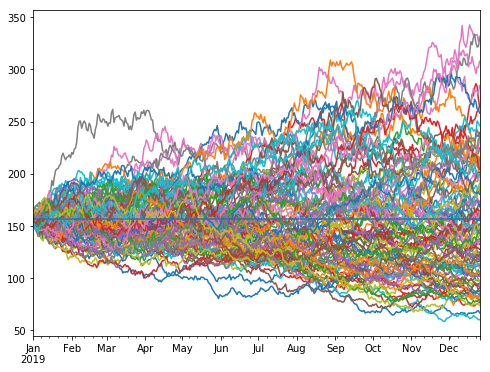

In [24]:
K=156.463837
dates=pd.date_range("20190101",periods=ndays)
strike=pd.DataFrame({"Strike":K*np.ones(ndays)},index=dates)
simul=pd.concat([simdata.T,strike.T]).T
simul.plot(figsize=(8,6),legend=False);

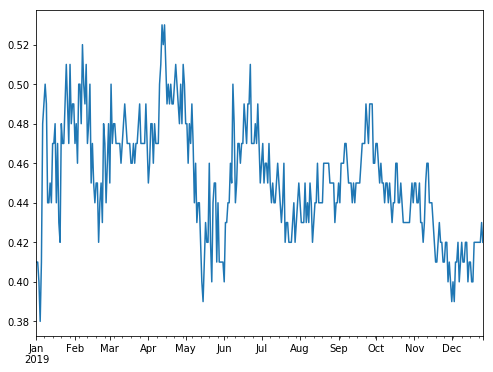

In [25]:
strike=pd.DataFrame(K*np.ones((ndays,ntraj)),index=dates)
count=simdata>strike
prob=count.T.sum()/ntraj
prob.plot(figsize=(8,6),legend=False);

## Microsoft

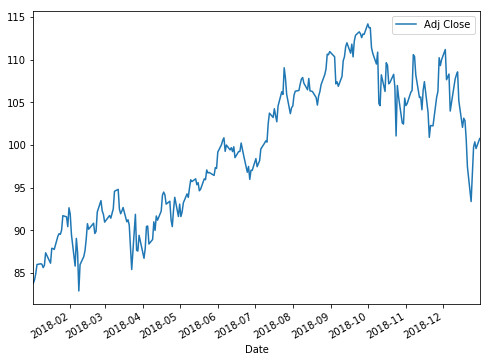

In [26]:
ticker="MSFT"
start_date="2018-01-01"
end_date="2018-12-31"
closes=get_historical_closes(ticker,start_date,end_date)
closes.plot(figsize=(8,6));

In [27]:
closes.iloc[-1]

Adj Close    100.765076
Name: 2018-12-31 00:00:00, dtype: float64

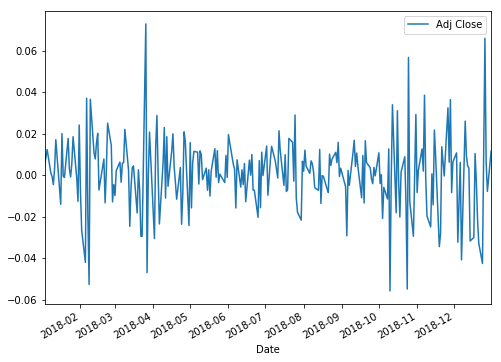

In [28]:
daily_returns=calc_daily_returns(closes)
daily_returns.plot(figsize=(8,6));

In [29]:
mu=daily_returns.mean().values[0]
sigma=daily_returns.std().values[0]
mu,sigma

(0.0007365826864234419, 0.017820340985024823)

In [30]:
ndays=360
ntraj=100
start_date="2019-01-01"
simret=daily_ret_sim(mu,sigma,ndays,ntraj,start_date)
simret

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
2019-01-01,0.008596,0.040793,-0.013282,-0.000748,-0.011189,0.020749,-0.005405,-0.036674,-0.001125,0.010580,...,-0.005148,0.015696,0.017818,-0.007287,0.030110,-0.029345,0.011786,0.002594,-0.053305,0.023878
2019-01-02,0.032737,-0.018055,-0.000177,-0.019661,0.023597,0.020892,-0.029468,-0.005193,-0.034373,-0.003866,...,0.004455,-0.019278,-0.030000,-0.002842,-0.009284,-0.001908,-0.029436,-0.031256,-0.020736,0.007841
2019-01-03,0.034102,-0.005177,-0.027356,0.009733,-0.008984,0.006723,0.004014,0.019045,0.000717,0.000749,...,-0.004088,-0.001824,-0.055479,0.004549,0.013596,0.005988,0.012177,-0.044604,0.028461,0.008142
2019-01-04,0.024766,0.004984,-0.036099,-0.011284,-0.009858,-0.016431,0.012891,-0.001098,-0.016167,-0.017408,...,0.010193,-0.036835,0.011625,-0.012598,-0.018789,0.013750,0.018208,0.034271,-0.005762,0.004085
2019-01-05,0.000670,-0.000867,0.017932,-0.009882,0.014415,0.002588,0.010447,-0.002035,-0.006242,0.006358,...,0.012223,-0.001896,0.000596,0.009541,-0.003444,0.009465,-0.008298,-0.017677,0.009231,0.019963
2019-01-06,-0.017067,0.010639,-0.006990,-0.005053,-0.022112,-0.057344,-0.006608,-0.027089,-0.000050,0.021268,...,0.017729,0.005407,0.012066,0.020806,-0.000192,0.005265,0.017763,0.006288,0.011679,0.005917
2019-01-07,0.028123,0.019273,-0.003866,0.032135,0.004337,0.002581,0.001361,0.018013,-0.000211,0.017704,...,0.034138,-0.002512,0.026046,0.014294,0.017791,-0.032783,0.029415,0.012917,0.009292,0.007366
2019-01-08,0.004775,0.013289,0.008256,0.026961,-0.002148,-0.013907,0.001801,-0.006516,-0.018433,-0.013998,...,-0.042282,0.020039,-0.005698,0.002296,0.037771,0.009408,-0.013075,0.023228,-0.008456,0.035797
2019-01-09,-0.016885,0.016592,0.022704,0.000447,0.015348,0.015148,0.005419,0.012743,-0.016128,-0.005278,...,0.030556,0.027588,0.000268,-0.008434,-0.002389,-0.002038,-0.014201,0.024024,0.022968,-0.013178
2019-01-10,-0.002648,0.045573,0.020471,0.007113,-0.036297,0.011919,-0.025843,-0.012571,0.013610,-0.010540,...,0.006062,0.043670,-0.007029,-0.018762,0.020685,0.021267,0.003506,-0.005588,0.010344,-0.000724


In [31]:
simdata=(closes.iloc[-1,:].values[0])*np.exp(simret.cumsum())
simdata

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
2019-01-01,101.635036,104.960552,99.435535,100.689702,99.643880,102.877661,100.221864,97.136586,100.651752,101.836853,...,100.247708,102.359113,102.576634,100.033439,103.845297,97.851082,101.959700,101.026801,95.534455,103.200140
2019-01-02,105.017369,103.082462,99.417896,98.729370,102.023133,105.049605,97.311594,96.633466,97.250810,101.443894,...,100.695309,100.404767,99.545051,99.749589,102.885695,97.664554,99.002130,97.917907,93.573845,104.012524
2019-01-03,108.660438,102.550144,96.735127,99.695011,101.110696,105.758190,97.703010,98.491521,97.320598,101.519921,...,100.284549,100.221810,94.172751,100.204406,104.294096,98.251103,100.215000,93.646374,96.275344,104.862896
2019-01-04,111.385173,103.062523,93.305366,98.576366,100.118834,104.034627,98.970612,98.383480,95.759869,99.767990,...,101.311968,96.597261,95.273878,98.949981,102.352830,99.611342,102.056424,96.911343,95.722212,105.292118
2019-01-05,111.459819,102.973194,94.993577,97.607052,101.572514,104.304210,100.009934,98.183463,95.164000,100.404354,...,102.557937,96.414254,95.330645,99.898569,102.000925,100.558663,101.213071,95.213333,96.609954,107.415137
2019-01-06,109.573642,104.074531,94.331927,97.115124,99.351184,98.491243,99.351282,95.559427,95.159257,102.562639,...,104.392440,96.936992,96.487833,101.998874,101.981320,101.089535,103.026972,95.813939,97.744897,108.052551
2019-01-07,112.698976,106.099828,93.967926,100.286602,99.782979,98.745794,99.486592,97.296328,95.139184,104.394564,...,108.017686,96.693812,99.033965,103.467289,103.811947,97.829233,106.102554,97.059577,98.657422,108.851442
2019-01-08,113.238435,107.519172,94.746941,103.027175,99.568907,97.382004,99.665967,96.664426,93.401591,102.943390,...,103.545669,98.651040,98.471292,103.705141,107.808000,98.753917,104.724266,99.340454,97.826675,112.818612
2019-01-09,111.342492,109.318060,96.922647,103.073267,101.108838,98.868402,100.207515,97.904097,91.907313,102.401439,...,106.758425,101.410547,98.497713,102.834134,107.550761,98.552860,103.247582,101.755895,100.099567,111.341673
2019-01-10,111.048057,114.415297,98.927217,103.809054,97.504719,100.053866,97.651062,96.681047,93.166745,101.327800,...,107.407597,105.937244,97.807777,100.922791,109.798639,100.671235,103.610182,101.188847,101.140321,111.261124


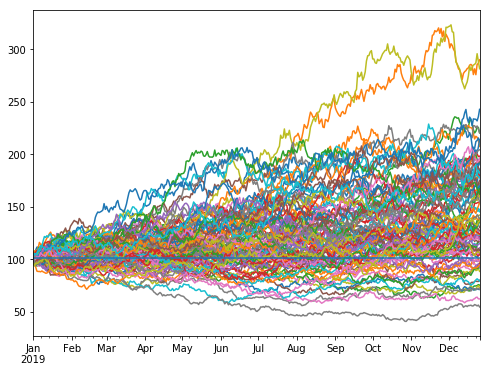

In [32]:
K=100.765076
dates=pd.date_range("20190101",periods=ndays)
strike=pd.DataFrame({"Strike":K*np.ones(ndays)},index=dates)
simul=pd.concat([simdata.T,strike.T]).T
simul.plot(figsize=(8,6),legend=False);

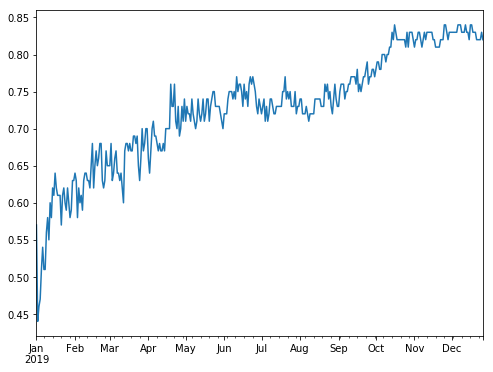

In [33]:
strike=pd.DataFrame(K*np.ones((ndays,ntraj)),index=dates)
count=simdata>strike
prob=count.T.sum()/ntraj
prob.plot(figsize=(8,6),legend=False);

## Comprobación de Datos

Aún no se termina el 2019 pero ya tenemos la mitad de los datos para determinar si mi simulación funcionó (al menos hasta julio). Voy a graficar las cotizaciones desde el 1 de enero de 2019 hasta el 30 de junio del mismo año.

**Apple**

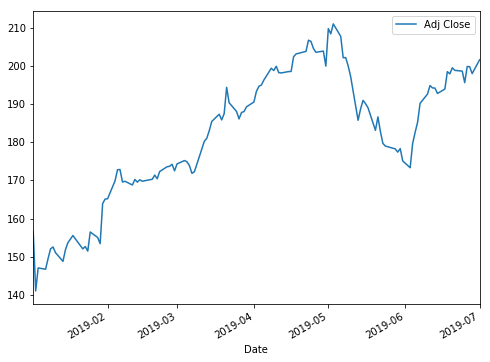

In [34]:
ticker="AAPL"
start_date="2019-01-01"
end_date="2019-06-30"
closes=get_historical_closes(ticker,start_date,end_date)
closes.plot(figsize=(8,6));

In [35]:
closes.iloc[-1]

Adj Close    201.550003
Name: 2019-07-01 00:00:00, dtype: float64

Puedo ver que al final del primer semestre, las acciones de Apple tienen una ganancia acumulada de aproximadamente el 35%, mientras que en mi simulación, las gráficas de los 100 escenarios parecieran concentrarse en el mismo umbral que establecí (el precio al cual terminó la acción en el año 2018). En la gráfica de las probabilidades, parece que a finales de junio había una probabilidad de aproximadamente 45% de que el precio de la acción hubiera sobrepasado el umbral. Haciendo un balance de todo eso, concluyo que la simulación predeció un estancamiento de la acción en el mismo precio con el que inició el año pero en realidad ganó un 35%, por lo que resultó no ser muy precisa.

**Microsoft**

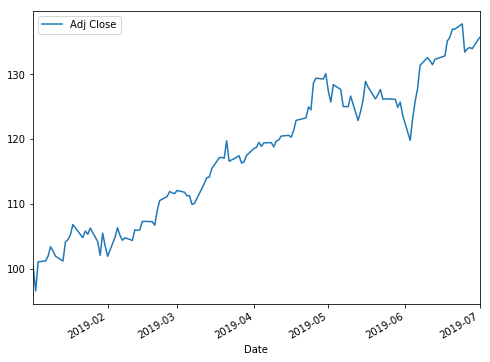

In [36]:
ticker="MSFT"
start_date="2019-01-01"
end_date="2019-06-30"
closes=get_historical_closes(ticker,start_date,end_date)
closes.plot(figsize=(8,6));

In [37]:
closes.iloc[-1]

Adj Close    135.679993
Name: 2019-07-01 00:00:00, dtype: float64

Coincidentemente, el precio de las acciones de Microsoft también presenta una ganancia acumulada de al rededor del 35%. Sin embargo, para Microsoft, la simulación fue más precisa. Esto debido a que la predicción fue más óptimista y la probabilidad de que el precio sobrepasara su umbral (el precio con el que abrió el año) al final del semestre, era de aproximadamente el 70%. Además, en la gráfica de los 100 esceneraios se ve claramente una tendencia más alcista que bajista. Con esto concluyo que al menos para Microsoft, la simulación de probabilidad precio-umbral fue más precisa.